In [98]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pickle
%matplotlib inline

## Read data

In [54]:
df = pd.read_csv('./Movies.csv')
# Create a new dataframe with 'Title' and 'Genres' columns
dfinit = df[['Title', 'Genres']]
df.head()

,Unnamed: 0,Title,Rating,Number of User Reviews,Year,Duration,Genres
0,0.0,Dekalog (1988),7.6,135.0,1996,9 h 32 m,['Drama']
1,1.0,Casablanca,8.7,592.0,1943,1 h 42 m,"['Drama', 'Romance', 'War']"
2,2.0,Rear Window,8.7,588.0,1954,1 h 52 m,"['Mystery', 'Thriller']"
3,3.0,Lawrence of Arabia (re-release),8.5,447.0,2002,3 h 36 m,"['Adventure', 'Biography', 'Drama', 'War']"
4,4.0,The Conformist,7.2,113.0,1970,1 h 47 m,['Drama']


In [55]:
df.shape

(14297, 7)

In [56]:
df.dtypes

Unnamed: 0                float64
Title                      object
Rating                     object
Number of User Reviews    float64
Year                       object
Duration                   object
Genres                     object
dtype: object

## EDA

In [57]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14297 entries, 0 to 14296
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   14295 non-null  object 
 1   Rating                  14287 non-null  object 
 2   Number of User Reviews  11866 non-null  float64
 3   Year                    14295 non-null  object 
 4   Duration                14276 non-null  object 
 5   Genres                  14297 non-null  object 
dtypes: float64(1), object(5)
memory usage: 670.3+ KB


In [59]:
df.dropna(inplace=True)


In [60]:
df.shape

(11847, 6)

## Rating Column cleaning

In [61]:
#change to approbate Dtype
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')


In [62]:
df.dtypes

Title                      object
Rating                    float64
Number of User Reviews    float64
Year                       object
Duration                   object
Genres                     object
dtype: object

In [63]:
# clean year column
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')


In [64]:
df = df[df['Duration'].str[0].str.isdigit()]


In [65]:
df['Duration'].unique()


array(['9 h 32 m', '1 h 42 m', '1 h 52 m', '3 h 36 m', '1 h 47 m',
       '2 h 55 m', '2 h 16 m', '3 h 7 m', '1 h 59 m', '2 h 45 m',
       '1 h 39 m', '2 h 8 m', '1 h 41 m', '3 h 8 m', '1 h 43 m',
       '2 h 35 m', '1 h 35 m', '2 h 25 m', '1 h 27 m', '1 h 51 m',
       '3 h 17 m', '1 h 50 m', '1 h 28 m', '3 h 27 m', '2 h 15 m',
       '1 h 36 m', '1 h 34 m', '2 h 6 m', '1 h 58 m', '2 h 1 m',
       '2 h 50 m', '2 h 18 m', '2 h 33 m', '1 h 45 m', '1 h 32 m',
       '2 h 42 m', '3 h 58 m', '1 h 44 m', '1 h 49 m', '2 h 2 m',
       '1 h 53 m', '2 h 12 m', '1 h 15 m', '1 h 40 m', '1 h 4 m',
       '1 h 8 m', '2 h 5 m', '1 h 21 m', '1 h 57 m', '2 h 14 m',
       '2 h 17 m', '2 h 40 m', '2 h 13 m', '2 h 4 m', '2 h 9 m',
       '1 h 23 m', '3 h 10 m', '1 h 31 m', '1 h 24 m', '2 h', '1 h 33 m',
       '3 h 4 m', '2 h 43 m', '1 h 38 m', '2 h 7 m', '2 h 11 m',
       '2 h 34 m', '2 h 37 m', '2 h 3 m', '2 h 54 m', '3 h 15 m',
       '1 h 46 m', '2 h 58 m', '1 h 54 m', '1 h 56 m', '2 h 53 m',
  

In [66]:
df = df[df['Duration'].str.contains('h|m', na=False)]


In [67]:
df['Duration'].unique()


array(['9 h 32 m', '1 h 42 m', '1 h 52 m', '3 h 36 m', '1 h 47 m',
       '2 h 55 m', '2 h 16 m', '3 h 7 m', '1 h 59 m', '2 h 45 m',
       '1 h 39 m', '2 h 8 m', '1 h 41 m', '3 h 8 m', '1 h 43 m',
       '2 h 35 m', '1 h 35 m', '2 h 25 m', '1 h 27 m', '1 h 51 m',
       '3 h 17 m', '1 h 50 m', '1 h 28 m', '3 h 27 m', '2 h 15 m',
       '1 h 36 m', '1 h 34 m', '2 h 6 m', '1 h 58 m', '2 h 1 m',
       '2 h 50 m', '2 h 18 m', '2 h 33 m', '1 h 45 m', '1 h 32 m',
       '2 h 42 m', '3 h 58 m', '1 h 44 m', '1 h 49 m', '2 h 2 m',
       '1 h 53 m', '2 h 12 m', '1 h 15 m', '1 h 40 m', '1 h 4 m',
       '1 h 8 m', '2 h 5 m', '1 h 21 m', '1 h 57 m', '2 h 14 m',
       '2 h 17 m', '2 h 40 m', '2 h 13 m', '2 h 4 m', '2 h 9 m',
       '1 h 23 m', '3 h 10 m', '1 h 31 m', '1 h 24 m', '2 h', '1 h 33 m',
       '3 h 4 m', '2 h 43 m', '1 h 38 m', '2 h 7 m', '2 h 11 m',
       '2 h 34 m', '2 h 37 m', '2 h 3 m', '2 h 54 m', '3 h 15 m',
       '1 h 46 m', '2 h 58 m', '1 h 54 m', '1 h 56 m', '2 h 53 m',
  

In [68]:
# Extract hours and minutes from the 'Duration' column
df['Hours'] = df['Duration'].str.extract(r'(\d+) h').astype(float).fillna(0)
df['Minutes'] = df['Duration'].str.extract(r'(\d+) m').astype(float).fillna(0)

# Display the updated dataframe to verify the changes
df.head()

,Title,Rating,Number of User Reviews,Year,Duration,Genres,Hours,Minutes
0,Dekalog (1988),7.6,135.0,1996,9 h 32 m,['Drama'],9.0,32.0
1,Casablanca,8.7,592.0,1943,1 h 42 m,"['Drama', 'Romance', 'War']",1.0,42.0
2,Rear Window,8.7,588.0,1954,1 h 52 m,"['Mystery', 'Thriller']",1.0,52.0
3,Lawrence of Arabia (re-release),8.5,447.0,2002,3 h 36 m,"['Adventure', 'Biography', 'Drama', 'War']",3.0,36.0
4,The Conformist,7.2,113.0,1970,1 h 47 m,['Drama'],1.0,47.0


In [69]:
# Calculate the total duration in minutes
df['Duration'] = df['Hours'] * 60 + df['Minutes']

# Display the updated dataframe to verify the changes
df.head()

,Title,Rating,Number of User Reviews,Year,Duration,Genres,Hours,Minutes
0,Dekalog (1988),7.6,135.0,1996,572.0,['Drama'],9.0,32.0
1,Casablanca,8.7,592.0,1943,102.0,"['Drama', 'Romance', 'War']",1.0,42.0
2,Rear Window,8.7,588.0,1954,112.0,"['Mystery', 'Thriller']",1.0,52.0
3,Lawrence of Arabia (re-release),8.5,447.0,2002,216.0,"['Adventure', 'Biography', 'Drama', 'War']",3.0,36.0
4,The Conformist,7.2,113.0,1970,107.0,['Drama'],1.0,47.0


In [70]:
df[df['Duration'].isnull()]


,Title,Rating,Number of User Reviews,Year,Duration,Genres,Hours,Minutes


In [71]:
df['Duration'] = df['Duration'].astype(int)


In [72]:
# drop hour , min after calculating duration
df.drop(['Hours', 'Minutes'], axis=1, inplace=True)


In [73]:
df.dtypes


Title                      object
Rating                    float64
Number of User Reviews    float64
Year                        Int64
Duration                    int64
Genres                     object
dtype: object

In [74]:
df['Genres'].unique().tolist()


["['Drama']",
 "['Drama', 'Romance', 'War']",
 "['Mystery', 'Thriller']",
 "['Adventure', 'Biography', 'Drama', 'War']",
 "['Crime', 'Drama']",
 "['Drama', 'History']",
 "['Drama', 'Mystery']",
 "['Drama', 'Mystery', 'Romance']",
 "['Mystery', 'Romance', 'Thriller']",
 "['Drama', 'Film-Noir', 'Romance', 'Thriller']",
 "['Comedy', 'Musical', 'Romance']",
 "['Comedy']",
 "['Crime', 'Drama', 'Film-Noir', 'Thriller']",
 "['Drama', 'War']",
 "['Comedy', 'Drama', 'Romance']",
 "['Comedy', 'Drama']",
 "['Animation', 'Adventure', 'Comedy', 'Family', 'Fantasy', 'Musical']",
 "['Action', 'Drama']",
 "['Action', 'Adventure', 'Drama', 'Western']",
 "['Crime', 'Drama', 'Romance']",
 "['Adventure', 'Drama', 'Western']",
 "['Drama', 'Fantasy', 'War']",
 "['Comedy', 'Music', 'Romance']",
 "['Action', 'Adventure', 'Mystery', 'Thriller']",
 "['Documentary', 'Drama', 'Sport']",
 "['Crime', 'Drama', 'Mystery']",
 "['Biography', 'Drama', 'History']",
 "['Drama', 'Sci-Fi']",
 "['Drama', 'Romance']",
 "['Bio

In [75]:
# Split the genres into individual columns
df['Genres'] = df['Genres'].apply(lambda x: x.strip("[]").replace("'", "").split(", "))

# Create a one-hot encoded dataframe for the genres
genres_one_hot = df['Genres'].str.join('|').str.get_dummies()

# Concatenate the original dataframe with the one-hot encoded genres
df = pd.concat([df, genres_one_hot], axis=1)

# Display the updated dataframe to verify the changes
df.head()

,Title,Rating,Number of User Reviews,Year,Duration,Genres,Action,Adventure,Animation,Biography,...,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,Unknown,War,Western
0,Dekalog (1988),7.6,135.0,1996,572,[Drama],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Casablanca,8.7,592.0,1943,102,"[Drama, Romance, War]",0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,Rear Window,8.7,588.0,1954,112,"[Mystery, Thriller]",0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,Lawrence of Arabia (re-release),8.5,447.0,2002,216,"[Adventure, Biography, Drama, War]",0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,The Conformist,7.2,113.0,1970,107,[Drama],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Bulding the Model


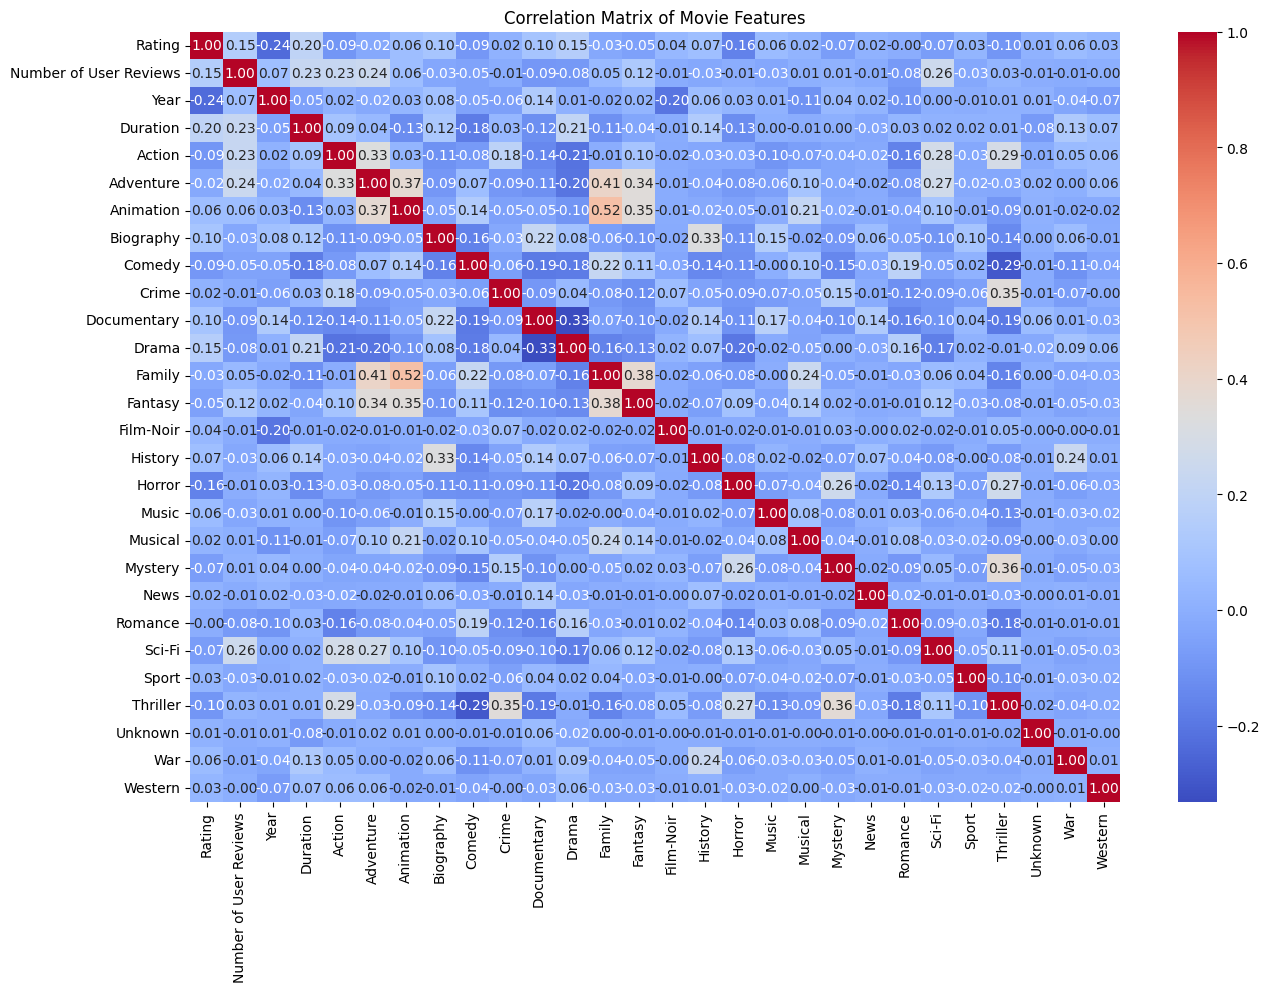

In [76]:
df_clean = df.select_dtypes(include=[float, int, bool])

# Calculate the correlation matrix
correlation_matrix = df_clean.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Movie Features')
plt.show()

In [77]:
relevant_features = ['Rating', 'Number of User Reviews', 'Year', 'Duration'] + list(df_clean.columns[4:])


In [78]:
# Extracting the relevant subset of the data
clustering_data = df_clean[relevant_features]

# Checking for missing values or other inconsistencies
clustering_data_info = {
    "missing_values": clustering_data.isnull().sum(),
    "sample_data": clustering_data.head()
}

clustering_data_info

{'missing_values': Rating                    0
 Number of User Reviews    0
 Year                      0
 Duration                  0
 Action                    0
 Adventure                 0
 Animation                 0
 Biography                 0
 Comedy                    0
 Crime                     0
 Documentary               0
 Drama                     0
 Family                    0
 Fantasy                   0
 Film-Noir                 0
 History                   0
 Horror                    0
 Music                     0
 Musical                   0
 Mystery                   0
 News                      0
 Romance                   0
 Sci-Fi                    0
 Sport                     0
 Thriller                  0
 Unknown                   0
 War                       0
 Western                   0
 dtype: int64,
 'sample_data':    Rating  Number of User Reviews  Year  Duration  Action  Adventure  \
 0     7.6                   135.0  1996       572       0         

In [79]:
clustering_data.drop(['Number of User Reviews', 'Rating', 'Duration', 'Year'], axis=1, inplace=True)


In [80]:
clustering_data.columns


Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi',
       'Sport', 'Thriller', 'Unknown', 'War', 'Western'],
      dtype='object')

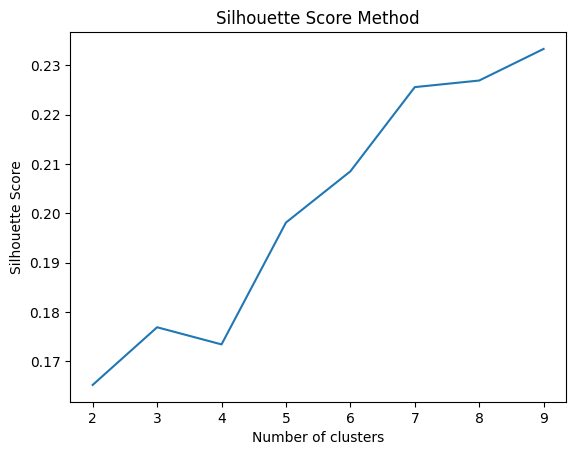

In [81]:
scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(clustering_data)
    score = silhouette_score(clustering_data, kmeans.labels_)
    scores.append(score)
 
plt.plot(range(2, 10), scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [82]:
# Apply K-Means with 9 clusters
kmeans_8 = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters_8 = kmeans_8.fit_predict(clustering_data)

# Calculate the silhouette score
silhouette_score_8 = silhouette_score(clustering_data, clusters_8)
print(f"Silhouette Score for 8 clusters: {silhouette_score_8}")

Silhouette Score for 8 clusters: 0.2269157149316713


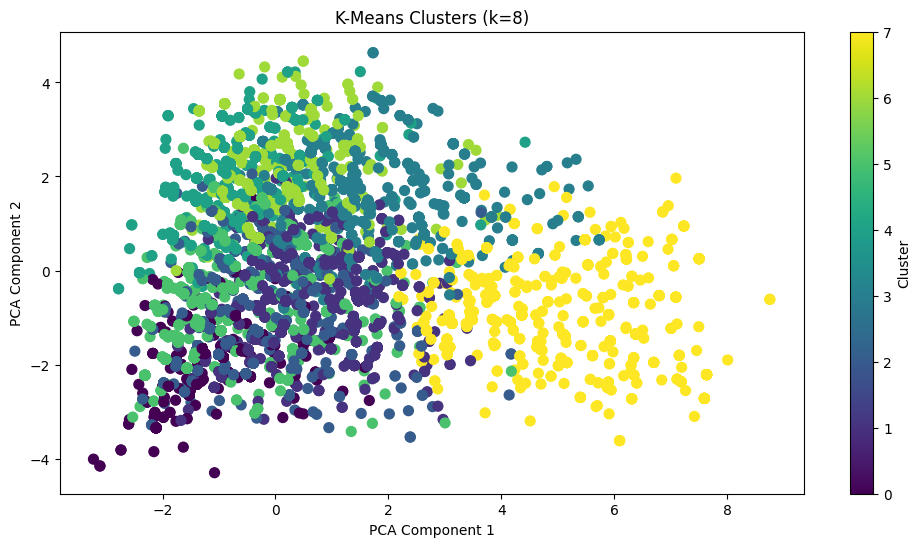

In [83]:
# Scale the clustering data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Visualize the clusters using PCA to reduce to 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(12, 6))

# Plot K-Means clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters_8, cmap='viridis', s=50)
plt.title('K-Means Clusters (k=8)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [84]:
# Add the cluster labels to the clustering_data dataframe
clustering_data['Cluster'] = clusters_8

# Display the updated dataframe to verify the changes
clustering_data.head()


,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Mystery,News,Romance,Sci-Fi,Sport,Thriller,Unknown,War,Western,Cluster
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,2
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,6
3,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,5
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,5


In [85]:
# Merge dfinit and clustering_data on the index
merged_df = pd.merge(dfinit, clustering_data, left_index=True, right_index=True)

# Display the merged dataframe to verify the changes
merged_df.head()

,Title,Genres,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Mystery,News,Romance,Sci-Fi,Sport,Thriller,Unknown,War,Western,Cluster
0,Dekalog (1988),['Drama'],0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
1,Casablanca,"['Drama', 'Romance', 'War']",0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,2
2,Rear Window,"['Mystery', 'Thriller']",0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,6
3,Lawrence of Arabia (re-release),"['Adventure', 'Biography', 'Drama', 'War']",0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,5
4,The Conformist,['Drama'],0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5


In [86]:
merged_df.value_counts('Cluster')


Cluster
5    2589
1    2253
2    1700
4    1291
6    1107
0    1050
3     959
7     648
Name: count, dtype: int64

## Cluster

In [87]:
merged_df[merged_df['Cluster'] == 0].iloc[:, 2:-1].sum().sort_values(ascending=False)


Documentary    1046
Biography       317
Music           187
History         170
Drama            66
Crime            64
Sport            61
War              56
Comedy           52
Family           22
News             22
Adventure        16
Animation        14
Mystery          12
Action            8
Thriller          7
Unknown           6
Romance           6
Musical           5
Horror            3
Western           3
Sci-Fi            2
Fantasy           1
Film-Noir         0
dtype: int64

In [88]:
merged_df[merged_df['Cluster'] == 0].sample(20)


,Title,Genres,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Mystery,News,Romance,Sci-Fi,Sport,Thriller,Unknown,War,Western,Cluster
895,The Last Waltz,"['Documentary', 'Biography', 'Music']",0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3697,"The Man Nobody Knew: In Search of My Father, C...","['Documentary', 'Biography', 'History', 'War']",0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2286,Brooklyn Castle,['Documentary'],0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3415,The Internet's Own Boy: The Story of Aaron Swartz,"['Documentary', 'Biography', 'Crime']",0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8067,For No Good Reason,"['Documentary', 'Biography', 'History', 'Music']",0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2143,Mugabe and the White African,['Documentary'],0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
824,"Hale County This Morning, This Evening",['Documentary'],0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3134,Free Angela & All Political Prisoners,"['Documentary', 'Crime', 'History']",0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1618,Louis Armstrong's Black & Blues,"['Documentary', 'Biography', 'Music']",0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1594,She's Beautiful When She's Angry,"['Documentary', 'History']",0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
merged_df[merged_df['Cluster'] == 1].iloc[:, 2:-1].sum().sort_values(ascending=False)


Comedy         2253
Drama           932
Romance         456
Crime           291
Action          159
Fantasy         134
Family          129
Horror          127
Music           120
Sport           105
Sci-Fi           88
Adventure        87
Mystery          79
Biography        74
Musical          72
History          34
War              33
Thriller         29
Western          18
Animation        14
Documentary       7
Film-Noir         1
Unknown           1
News              0
dtype: int64

In [90]:
merged_df[merged_df['Cluster'] == 2].iloc[:, 2:-1].sum().sort_values(ascending=False)


Romance        1700
Drama          1685
Comedy          681
Biography       145
Music           130
Thriller        120
Fantasy         115
Mystery          92
Crime            88
War              84
History          84
Adventure        67
Sci-Fi           56
Musical          55
Action           47
Sport            42
Family           37
Western          31
Horror           26
Animation        15
Film-Noir         6
Documentary       2
News              0
Unknown           0
dtype: int64

In [91]:
merged_df[merged_df['Cluster'] == 2].sample(20)


,Title,Genres,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Mystery,News,Romance,Sci-Fi,Sport,Thriller,Unknown,War,Western,Cluster
8354,Great Expectations,"['Drama', 'Romance']",0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,2
11157,Stomp the Yard,"['Drama', 'Music', 'Romance']",0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,2
9288,Last Holiday,"['Comedy', 'Drama', 'Romance']",0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,2
11892,Four Christmases,"['Comedy', 'Drama', 'Romance']",0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,2
4752,Sometimes I Think About Dying,"['Comedy', 'Drama', 'Romance']",0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,2
10936,Latter Days,"['Comedy', 'Drama', 'Romance']",0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,2
767,West Side Story,"['Crime', 'Drama', 'Musical', 'Romance']",0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,2
11426,Love in the Time of Cholera,"['Drama', 'Romance']",0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,2
7755,First Knight,"['Action', 'Adventure', 'Drama', 'Romance']",1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,2
14043,Bigger Than the Sky,"['Comedy', 'Drama', 'Romance']",0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,2


In [92]:
merged_df[merged_df['Cluster'] == 3].iloc[:, 2:-1].sum().sort_values(ascending=False)


Action         931
Adventure      664
Thriller       480
Sci-Fi         474
Fantasy        213
Comedy         178
Drama          177
Mystery         73
Horror          69
Romance         52
Crime           48
War             41
Animation       35
Western         31
Family          26
History         17
Sport           10
Biography        5
Documentary      2
Music            2
Musical          1
Film-Noir        0
News             0
Unknown          0
dtype: int64

In [93]:
merged_df[merged_df['Cluster'] == 4].iloc[:, 2:-1].sum().sort_values(ascending=False)


Thriller       1247
Crime          1201
Drama           934
Action          630
Mystery         361
Comedy          176
Romance          96
Biography        56
Adventure        50
History          39
Sci-Fi           38
War              34
Horror           30
Western          19
Film-Noir        16
Fantasy          15
Animation         9
Music             7
Sport             5
Musical           4
Family            4
Documentary       3
News              0
Unknown           0
dtype: int64

In [94]:
merged_df[merged_df['Cluster'] == 5].iloc[:, 2:-1].sum().sort_values(ascending=False)


Drama          2575
Biography       472
Thriller        406
History         317
Crime           255
Mystery         244
War             237
Adventure       139
Sport           134
Music           130
Action          122
Fantasy          89
Western          86
Sci-Fi           73
Family           71
Horror           54
Musical          35
Animation        33
Documentary       8
Film-Noir         5
Unknown           2
Comedy            0
News              0
Romance           0
dtype: int64

In [95]:
merged_df[merged_df['Cluster'] == 6].iloc[:, 2:-1].sum().sort_values(ascending=False)


Horror         988
Thriller       852
Mystery        536
Drama          317
Sci-Fi         244
Fantasy        139
Comedy          85
Action          84
Crime           62
Romance         39
Adventure       27
Animation        9
Music            8
War              7
Musical          5
Film-Noir        4
Western          3
Documentary      3
Family           3
History          3
Biography        2
News             0
Sport            0
Unknown          0
dtype: int64

In [96]:
merged_df[merged_df['Cluster'] == 7].iloc[:, 2:-1].sum().sort_values(ascending=False)


Family         606
Adventure      557
Comedy         503
Fantasy        470
Animation      370
Drama          149
Musical        122
Sci-Fi         116
Action         112
Romance         84
Mystery         53
Crime           36
Music           27
Sport           21
Horror          19
Thriller        12
War              7
History          5
Western          5
Biography        1
Documentary      0
Film-Noir        0
News             0
Unknown          0
dtype: int64

### Evalution

In [97]:

# Calculate the silhouette score for the clusters
silhouette_avg = silhouette_score(clustering_data, clusters_8)
print(f"Silhouette Score for 8 clusters: {silhouette_avg}")

Silhouette Score for 8 clusters: 0.36884877610241384


In [101]:
with open('trained_pipeline_v1.pkl', 'wb') as f:
    pickle.dump(clusters_8, f)

In [100]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
import joblib
joblib.dump(clusters_8, 'kmeans_model.joblib')
joblib.dump(scaler, 'scaler.joblib')